In [72]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import numpy as np

# Use this when 403,404 found and use after url headers=headers it will in html format and use .text to show
## web page html code

In [2]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget',headers=headers).text

In [3]:
soup=BeautifulSoup(webpage,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js">
  </script>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/
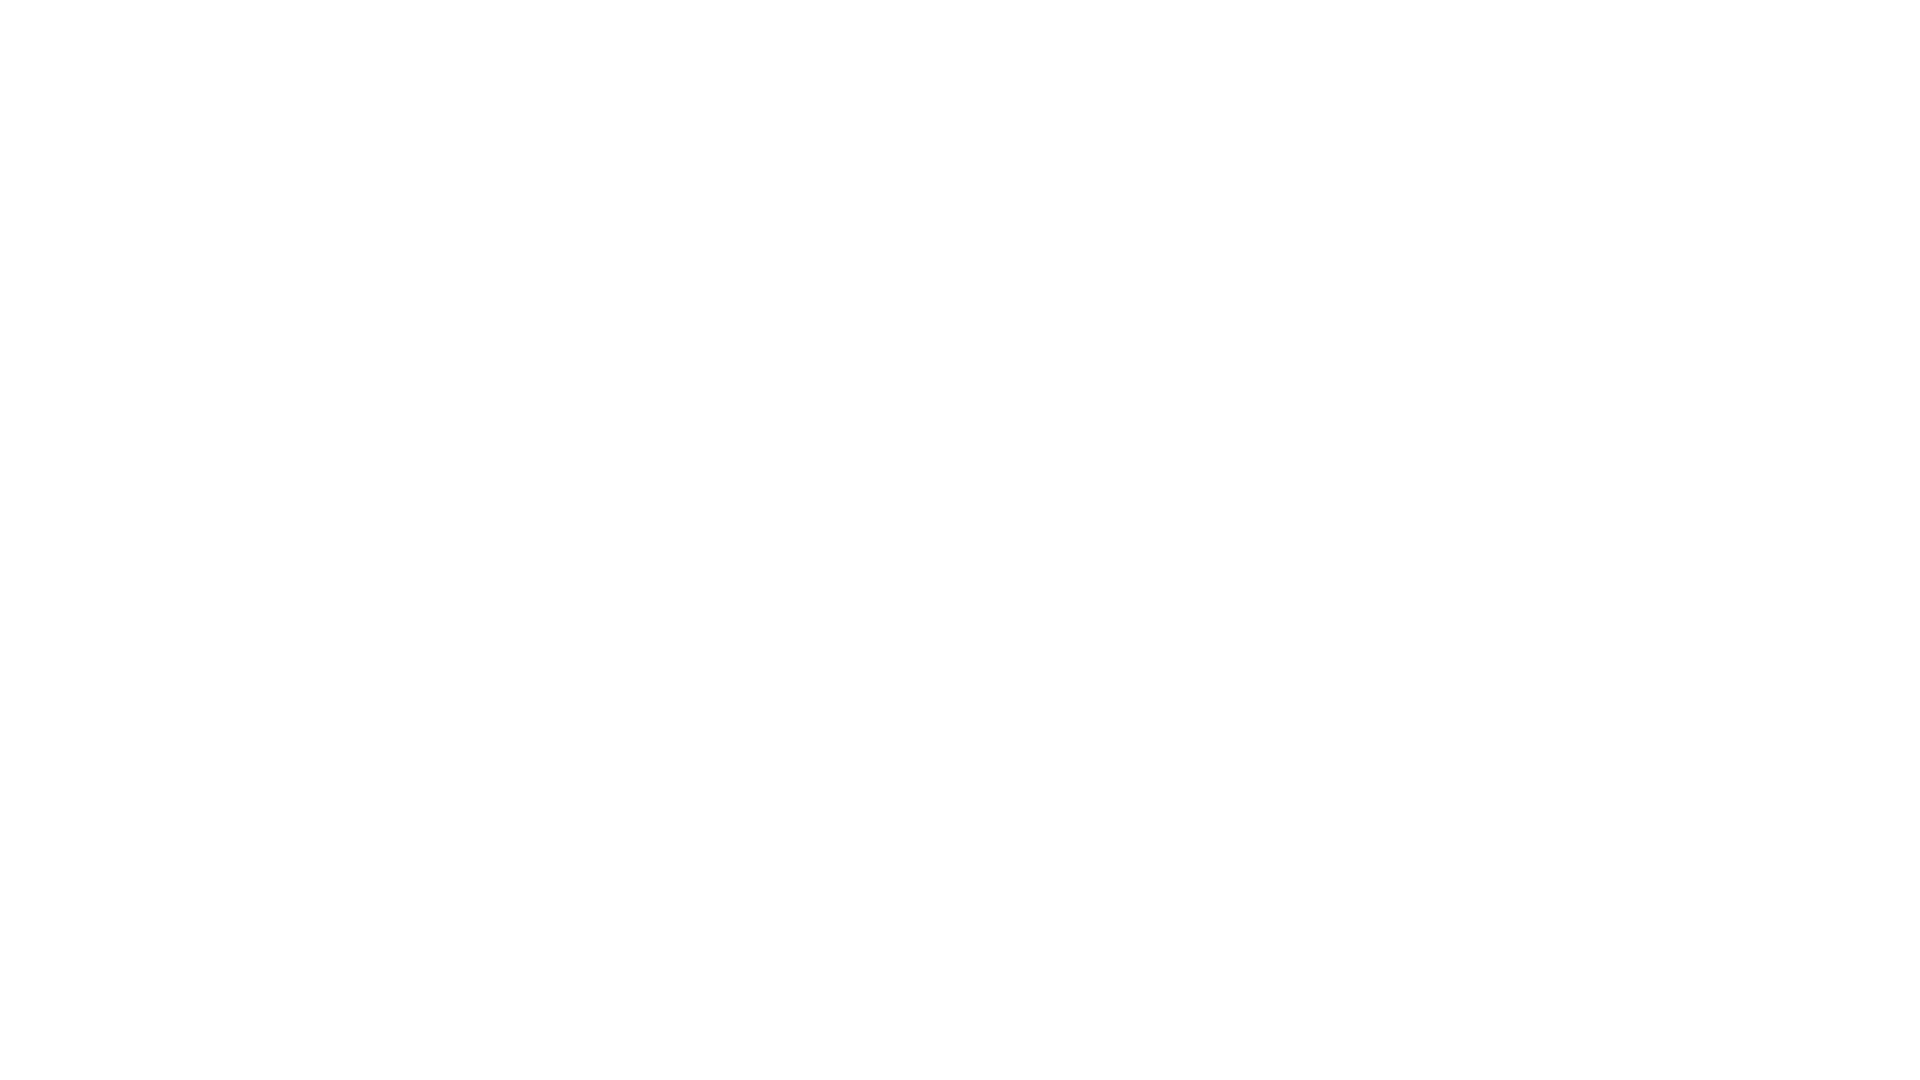

In [4]:
print(soup.prettify())

In [5]:
soup.find_all('h1')[0].text.strip()

'List of companies in India'

In [6]:
for i in soup.find_all('h2'):
    print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
ICICI Bank
HDFC Bank
Infosys
Capgemini
Tech Mahindra
HCLTech
Genpact
Axis Bank
Concentrix Corporation
Amazon
Reliance Jio
IBM
Larsen & Toubro Limited
Reliance Retail
HDB Financial Services
Teleperformance
Companies by  Industry
Companies by  Locations
Companies by  Type
Companies by  Badges


In [7]:
len(soup.find_all('h2'))

24

In [8]:
len(soup.find_all('span', class_='companyCardWrapper__companyRatingValue'))
    

20

In [9]:
for i in soup.find_all('span', class_='companyCardWrapper__companyRatingValue'):
    print(i.text.strip())

3.8
4.1
3.9
3.8
4.0
3.9
3.9
3.9
3.7
3.7
3.9
3.8
3.9
4.2
3.9
4.1
4.0
3.9
4.0
3.6


# real scrapping

In [10]:
company=soup.find_all('div',class_='companyCardWrapper')

In [11]:
len(company)

20

# null list bna lege

In [91]:
name=[]
rating=[]
reviews=[]
description=[]

for i in company:

  name.append(i.find('h2',class_='companyCardWrapper__companyName').text.strip())
  rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
  reviews.append(i.find('span' , class_='companyCardWrapper__ActionCount').text.strip())
  description.append(i.find_all('span',class_='companyCardWrapper__interLinking')[0].text.strip())
    
df=pd.DataFrame({'name':name,
   'rating':rating,
   'reviews':reviews,
   'Description':description,
   })

In [92]:
df.shape

(20, 4)

In [93]:
df

,name,rating,reviews,Description
0,Shubham Flexible Packaging Machine Pvt. Ltd. F...,3.5,64,Industrial Machinery | 201-500 Employees | 21 ...
1,Delhi Integrated Multi Modal Transit System,3.7,64,Urban Transport | 201-500 Employees | 16 years...
2,Anabond,4.2,64,Chemicals | 501-1k Employees | 44 years old | ...
3,Mythri Infra,3.3,64,Engineering & Construction | 51-200 Employees ...
4,Jasubhai Engineering,3.8,64,Engineering & Construction | 51-200 Employees ...
5,Tokai Rika Minda,3.9,64,Semiconductors | 51-200 Employees | 75 years o...
6,Locobuzz,4.2,64,Software Product | 51-200 Employees | 8 years ...
7,IVY SOFTWARE DEVELOPMENT SERVICES,4.2,64,Software Product | 1k-5k Employees | 22 years ...
8,Community Health Center,4.2,64,Healthcare | 201-500 Employees (Global) | Akro...
9,Ekya Schools,3.9,64,Education & Training | 201-500 Employees | 13 ...


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         20 non-null     object
 1   rating       20 non-null     object
 2   reviews      20 non-null     object
 3   Description  20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [95]:
s=df['Description'].str.split(pat='|',n=5,expand=True)

In [96]:
s

,0,1,2,3,4
0,Industrial Machinery,201-500 Employees,21 years old,Faridabad +2 more,None
1,Urban Transport,201-500 Employees,16 years old,Delhi/NCR +10 more,None
2,Chemicals,501-1k Employees,44 years old,Chennai +9 more,None
3,Engineering & Construction,51-200 Employees,4 years old,Visakhapatnam +8 more,None
4,Engineering & Construction,51-200 Employees,56 years old,Mumbai +11 more,None
5,Semiconductors,51-200 Employees,75 years old,Oguchi +5 more,None
6,Software Product,51-200 Employees,8 years old,Mumbai +4 more,None
7,Software Product,1k-5k Employees,22 years old,Hyderabad/Secunderabad +1 more,None
8,Healthcare,201-500 Employees (Global),Akron +28 more,None,None
9,Education & Training,201-500 Employees,13 years old,Bangalore/Bengaluru +2 more,None


In [97]:
df['field']=s[0]
df['employees']=s[1]
df['ctype']=s[2]
df['old']=s[3]
df['location']=s[4]
df

,name,rating,reviews,Description,field,employees,ctype,old,location
0,Shubham Flexible Packaging Machine Pvt. Ltd. F...,3.5,64,Industrial Machinery | 201-500 Employees | 21 ...,Industrial Machinery,201-500 Employees,21 years old,Faridabad +2 more,None
1,Delhi Integrated Multi Modal Transit System,3.7,64,Urban Transport | 201-500 Employees | 16 years...,Urban Transport,201-500 Employees,16 years old,Delhi/NCR +10 more,None
2,Anabond,4.2,64,Chemicals | 501-1k Employees | 44 years old | ...,Chemicals,501-1k Employees,44 years old,Chennai +9 more,None
3,Mythri Infra,3.3,64,Engineering & Construction | 51-200 Employees ...,Engineering & Construction,51-200 Employees,4 years old,Visakhapatnam +8 more,None
4,Jasubhai Engineering,3.8,64,Engineering & Construction | 51-200 Employees ...,Engineering & Construction,51-200 Employees,56 years old,Mumbai +11 more,None
5,Tokai Rika Minda,3.9,64,Semiconductors | 51-200 Employees | 75 years o...,Semiconductors,51-200 Employees,75 years old,Oguchi +5 more,None
6,Locobuzz,4.2,64,Software Product | 51-200 Employees | 8 years ...,Software Product,51-200 Employees,8 years old,Mumbai +4 more,None
7,IVY SOFTWARE DEVELOPMENT SERVICES,4.2,64,Software Product | 1k-5k Employees | 22 years ...,Software Product,1k-5k Employees,22 years old,Hyderabad/Secunderabad +1 more,None
8,Community Health Center,4.2,64,Healthcare | 201-500 Employees (Global) | Akro...,Healthcare,201-500 Employees (Global),Akron +28 more,None,None
9,Ekya Schools,3.9,64,Education & Training | 201-500 Employees | 13 ...,Education & Training,201-500 Employees,13 years old,Bangalore/Bengaluru +2 more,None


In [98]:
df.drop(columns='Description',inplace=True)
df

,name,rating,reviews,field,employees,ctype,old,location
0,Shubham Flexible Packaging Machine Pvt. Ltd. F...,3.5,64,Industrial Machinery,201-500 Employees,21 years old,Faridabad +2 more,None
1,Delhi Integrated Multi Modal Transit System,3.7,64,Urban Transport,201-500 Employees,16 years old,Delhi/NCR +10 more,None
2,Anabond,4.2,64,Chemicals,501-1k Employees,44 years old,Chennai +9 more,None
3,Mythri Infra,3.3,64,Engineering & Construction,51-200 Employees,4 years old,Visakhapatnam +8 more,None
4,Jasubhai Engineering,3.8,64,Engineering & Construction,51-200 Employees,56 years old,Mumbai +11 more,None
5,Tokai Rika Minda,3.9,64,Semiconductors,51-200 Employees,75 years old,Oguchi +5 more,None
6,Locobuzz,4.2,64,Software Product,51-200 Employees,8 years old,Mumbai +4 more,None
7,IVY SOFTWARE DEVELOPMENT SERVICES,4.2,64,Software Product,1k-5k Employees,22 years old,Hyderabad/Secunderabad +1 more,None
8,Community Health Center,4.2,64,Healthcare,201-500 Employees (Global),Akron +28 more,None,None
9,Ekya Schools,3.9,64,Education & Training,201-500 Employees,13 years old,Bangalore/Bengaluru +2 more,None


In [99]:
df.dropna()

,name,rating,reviews,field,employees,ctype,old,location
10,Meddo,3.3,64,Internet,11-50 Employees,Startup,5 years old,Gurgaon +6 more


#  real full web scraping

In [101]:
final=pd.DataFrame()
for j in range(1,500):
    webpage=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget&page={}'.format(j),headers=headers).text
    soup=BeautifulSoup(webpage,'lxml')
    company=soup.find_all('div',class_='companyCardWrapper')
    name=[]
    rating=[]
    reviews=[]
    description=[]

    for i in company:
        
        try:
            name.append(i.find('h2',class_='companyCardWrapper__companyName').text.strip())
        except:
            name.append(np.nan)

        try:
            rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
        except:
            rating.append(np.nan)
   
        try:
            reviews.append(i.find('span' , class_='companyCardWrapper__ActionCount').text.strip())
        except:
            reviews.append(np.nan)

        try:
            description.append(i.find_all('span',class_='companyCardWrapper__interLinking')[0].text.strip())
        except:
            description.append(np.nan)
   
    df=pd.DataFrame({'name':name,
   'rating':rating,
   'reviews':reviews,
   'Description':description
   })
    final=final.append(df,ignore_index=True)




     


C:\Users\khushal rathi\AppData\Local\Temp\ipykernel_17004\627417597.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final=final.append(df,ignore_index=True)


In [102]:
final

,name,rating,reviews,Description
0,TCS,3.8,64.3k,IT Services & Consulting | 1 Lakh+ Employees |...
1,Accenture,4.1,41k,IT Services & Consulting | 1 Lakh+ Employees |...
2,Cognizant,3.9,37.3k,IT Services & Consulting | 1 Lakh+ Employees |...
3,Wipro,3.8,34k,IT Services & Consulting | 1 Lakh+ Employees |...
4,ICICI Bank,4.0,30.1k,Banking | 1 Lakh+ Employees | Public | 29 year...
...,...,...,...,...
9975,Jarvis Technology and Strategy Consulting,3.8,64,Management Consulting | 201-500 Employees (Glo...
9976,Calcutta High Court,4.5,64,Law Enforcement & Security | Public | 161 year...
9977,Spaco Technologies,4.1,64,Automobile | 51-200 Employees | 52 years old |...
9978,New Holland,4.2,64,Greater Noida +17 more


In [103]:
final.shape

(9980, 4)

In [104]:
k=final['Description'].str.split(pat='|',n=5,expand=True)

In [105]:
k

,0,1,2,3,4
0,IT Services & Consulting,1 Lakh+ Employees,Public,55 years old,Mumbai +286 more
1,IT Services & Consulting,1 Lakh+ Employees,Public,34 years old,Dublin +143 more
2,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,29 years old,Teaneck. New Jersey. +112 more
3,IT Services & Consulting,1 Lakh+ Employees,Public,78 years old,Bangalore/Bengaluru +247 more
4,Banking,1 Lakh+ Employees,Public,29 years old,Mumbai +1202 more
...,...,...,...,...,...
9975,Management Consulting,201-500 Employees (Global),7 years old,Mumbai +18 more,None
9976,Law Enforcement & Security,Public,161 years old,Kolkata +1 more,None
9977,Automobile,51-200 Employees,52 years old,Pune +3 more,None
9978,Greater Noida +17 more,None,None,None,None


In [106]:
final['field']=k[0]
final['employees']=k[1]
final['ctype']=k[2]
final['old']=k[3]
final['location']=k[4]

In [107]:
final

,name,rating,reviews,Description,field,employees,ctype,old,location
0,TCS,3.8,64.3k,IT Services & Consulting | 1 Lakh+ Employees |...,IT Services & Consulting,1 Lakh+ Employees,Public,55 years old,Mumbai +286 more
1,Accenture,4.1,41k,IT Services & Consulting | 1 Lakh+ Employees |...,IT Services & Consulting,1 Lakh+ Employees,Public,34 years old,Dublin +143 more
2,Cognizant,3.9,37.3k,IT Services & Consulting | 1 Lakh+ Employees |...,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,29 years old,Teaneck. New Jersey. +112 more
3,Wipro,3.8,34k,IT Services & Consulting | 1 Lakh+ Employees |...,IT Services & Consulting,1 Lakh+ Employees,Public,78 years old,Bangalore/Bengaluru +247 more
4,ICICI Bank,4.0,30.1k,Banking | 1 Lakh+ Employees | Public | 29 year...,Banking,1 Lakh+ Employees,Public,29 years old,Mumbai +1202 more
...,...,...,...,...,...,...,...,...,...
9975,Jarvis Technology and Strategy Consulting,3.8,64,Management Consulting | 201-500 Employees (Glo...,Management Consulting,201-500 Employees (Global),7 years old,Mumbai +18 more,None
9976,Calcutta High Court,4.5,64,Law Enforcement & Security | Public | 161 year...,Law Enforcement & Security,Public,161 years old,Kolkata +1 more,None
9977,Spaco Technologies,4.1,64,Automobile | 51-200 Employees | 52 years old |...,Automobile,51-200 Employees,52 years old,Pune +3 more,None
9978,New Holland,4.2,64,Greater Noida +17 more,Greater Noida +17 more,None,None,None,None


In [108]:
final.drop(columns='Description',inplace=True)
final

,name,rating,reviews,field,employees,ctype,old,location
0,TCS,3.8,64.3k,IT Services & Consulting,1 Lakh+ Employees,Public,55 years old,Mumbai +286 more
1,Accenture,4.1,41k,IT Services & Consulting,1 Lakh+ Employees,Public,34 years old,Dublin +143 more
2,Cognizant,3.9,37.3k,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,29 years old,Teaneck. New Jersey. +112 more
3,Wipro,3.8,34k,IT Services & Consulting,1 Lakh+ Employees,Public,78 years old,Bangalore/Bengaluru +247 more
4,ICICI Bank,4.0,30.1k,Banking,1 Lakh+ Employees,Public,29 years old,Mumbai +1202 more
...,...,...,...,...,...,...,...,...
9975,Jarvis Technology and Strategy Consulting,3.8,64,Management Consulting,201-500 Employees (Global),7 years old,Mumbai +18 more,None
9976,Calcutta High Court,4.5,64,Law Enforcement & Security,Public,161 years old,Kolkata +1 more,None
9977,Spaco Technologies,4.1,64,Automobile,51-200 Employees,52 years old,Pune +3 more,None
9978,New Holland,4.2,64,Greater Noida +17 more,None,None,None,None


In [109]:
final.to_csv('companies.csv')

In [113]:
final.dropna()

,name,rating,reviews,field,employees,ctype,old,location
0,TCS,3.8,64.3k,IT Services & Consulting,1 Lakh+ Employees,Public,55 years old,Mumbai +286 more
1,Accenture,4.1,41k,IT Services & Consulting,1 Lakh+ Employees,Public,34 years old,Dublin +143 more
2,Cognizant,3.9,37.3k,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,29 years old,Teaneck. New Jersey. +112 more
3,Wipro,3.8,34k,IT Services & Consulting,1 Lakh+ Employees,Public,78 years old,Bangalore/Bengaluru +247 more
4,ICICI Bank,4.0,30.1k,Banking,1 Lakh+ Employees,Public,29 years old,Mumbai +1202 more
...,...,...,...,...,...,...,...,...
9928,Hindustan Composites,3.7,64,Auto Components,501-1k Employees,Public,59 years old,Mumbai +9 more
9929,Pearson,4.2,64,Education & Training,10k-50k Employees (Global),Conglomerate,179 years old,London +10 more
9940,Hush Puppies,4.1,64,Internet,51-200 Employees,Startup,5 years old,Bangalore +16 more
9959,Uber eats,4.3,64,Internet,1k-5k Employees (Global),Startup,9 years old,San Francisco +20 more


In [114]:
final.to_csv('Companies.csv')